## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [85]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import random
from math import sqrt
from sklearn import cluster
from scipy import misc
from numpy import zeros

rand = random.Random()

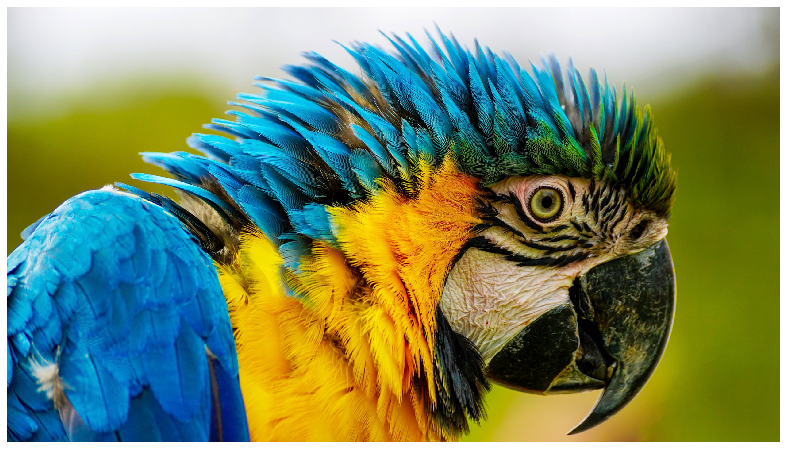

In [86]:
# Load an image.
imagex = image.imread("parrot.jpeg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [94]:
# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 5 # How many clusters we want
#
#kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
#

#instantiate necessary lists of clusters, centroids and labels
clusters = []
centroids = []
cluster_labels = []

#assign list of 5 centroids and clusters. Each centroid being an [x,y,z] coord
for centroid in range(cluster_count):
    centroids.append([])
    clusters.append([])
for centroid in range(len(centroids)):
    for dim in range(3):
        #assign random x,y,z pixel values
        centroids[centroid].append(rand.randint(0,256))
for label in range(len(image_2d)):
    cluster_labels.append(0)
print("Initial Centroids:",centroids)

#
#kmeans_cluster.fit(image_2d) # Apply it to the data
#
#func: calculate distance between two points in the same dimension
def calc_distance(pixel, centroid):
    distance = 0
    for dim in range(len(pixel)):
        distance += (pixel[dim]-centroid[dim])**2
    return sqrt(distance)     

#func: sort pixels into clusters
def sort_pixels_to_cluster():
    #CLEAR CLUSTERS after each iteration
    for cluster in range(len(clusters)):
        clusters[cluster] = []
    #for each pixel in the image
    for pixel in range(len(image_2d)):
        #calculate distance to first centroid, and store which is closest
        distance = calc_distance(image_2d[pixel],centroids[0])
        closest = 0
        #for each centroid, calculate distance this pixel is from it, update closest
        for cluster in range(1,cluster_count):
            new_distance = calc_distance(image_2d[pixel],centroids[cluster])
            if(new_distance < distance):
                closest = cluster
        #add this pixel to cluster and update labels
        clusters[closest].append(image_2d[pixel])
        cluster_labels[pixel] = closest

#func: create new centroids after sorting clusters
def new_centroids():
    length = 0
    #for each centroid / cluster
    for cluster in range(len(clusters)):
        #get the size of the cluster
        length = len(clusters[cluster])
        #if the cluster is not empty
        if(length != 0):
            #create a new centroid of mean values of all pixels in cluster
            centroids[cluster] = []
            for dim in range(3):
                new_value = 0
                for pixel in range(length):
                    new_value += clusters[cluster][pixel][dim]
                centroids[cluster].append((int)(new_value/length))

#
#cluster_centers = kmeans_cluster.cluster_centers_ # we're not using these
#
#func: compute kMeans of clusters
def kMeans_clusters():
    #store cycles
    cycles = 0
    #forever, until stable
    while(True):
        #increment cycles
        cycles += 1
        #sort pixels into clusters
        sort_pixels_to_cluster()
        #create new centroids
        old_centroids = centroids.copy()
        new_centroids()
        print(centroids)
        #if centroids are stable, end iterations
        if(check_stabilised(old_centroids,centroids)):
            print("Final Centroids:",centroids)
            print("Cycles:",cycles)
            return

#func: check centroids with previous set, determine if stable
def check_stabilised(old,new):
    for centroid in range(len(old)):
        for dim in range(3):
            if(new[centroid][dim] > old[centroid][dim]+5 or new[centroid][dim] < old[centroid][dim]-5):
                return False;
    return True

kMeans_clusters()

#
#cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel
#


Initial Centroids: [[34, 100, 235], [204, 52, 23], [174, 52, 50], [236, 35, 152], [28, 53, 54]]
[[26, 141, 191], [204, 52, 23], [128, 151, 134], [215, 215, 208], [111, 103, 27]]
[[9, 121, 175], [204, 52, 23], [96, 146, 160], [214, 220, 222], [122, 109, 25]]
[[6, 114, 167], [204, 52, 23], [76, 156, 178], [215, 225, 230], [127, 113, 30]]
[[5, 104, 158], [204, 52, 23], [43, 174, 204], [149, 204, 224], [145, 133, 63]]
[[8, 67, 102], [24, 0, 2], [13, 166, 208], [87, 193, 222], [162, 149, 73]]
[[16, 77, 115], [28, 27, 11], [4, 114, 179], [13, 163, 208], [172, 161, 82]]
[[20, 76, 109], [36, 36, 14], [4, 96, 164], [12, 149, 200], [176, 163, 84]]
[[23, 74, 101], [43, 43, 13], [4, 89, 152], [10, 142, 195], [179, 166, 87]]
[[27, 72, 94], [49, 49, 12], [4, 84, 142], [9, 138, 192], [182, 169, 91]]
[[32, 71, 86], [58, 59, 10], [4, 78, 134], [9, 135, 190], [188, 174, 98]]
[[38, 71, 78], [66, 66, 9], [4, 72, 126], [8, 132, 188], [194, 178, 105]]
[[43, 70, 71], [71, 71, 8], [4, 67, 118], [8, 130, 185],

In [95]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[10. 13.  4.  0.]
[39. 40. 21.  1.]
[94. 95.  1.  2.]
[  1.  76. 123.   3.]
[166. 162. 134.   4.]


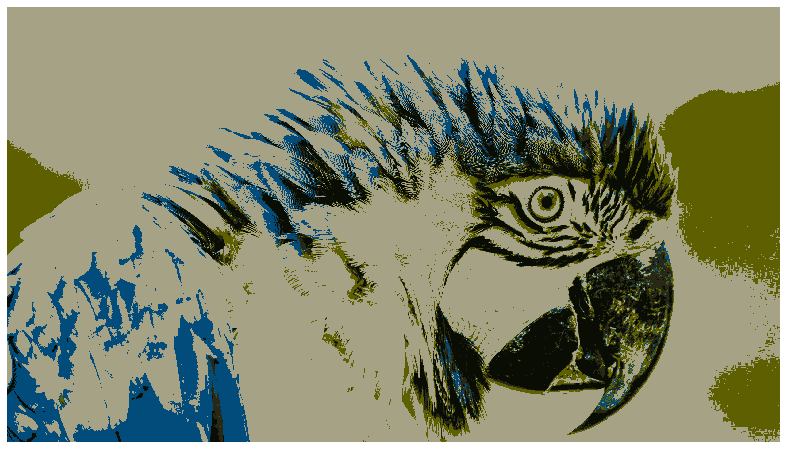

In [96]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')